In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우가 많다. 
# 그런 보기 싫은 부분들을 제거해주겠다.
# import warnings
# warnings.filterwarnings('ignore')

# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 할 수 있음
import os
os.getcwd() # 현재 디렉토리 파악
# os.chdir(r"______") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import platform                

# 웬만하면 해주는 것이 좋다
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-v0_8-whitegrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)
    
# tqdm
from tqdm.notebook import tqdm

# data
path = 'c:/reposit/data/GBG/'

## 데이터 불러오기

In [88]:
df1 = pd.read_csv(path + '1.최초요양신청서 처리 현황(2017년, 2018년).csv', low_memory=False)
df2 = pd.read_csv(path + '1.최초요양신청서 처리 현황(2019년, 2020년).csv', low_memory=False)
df3 = pd.read_csv(path + '1.최초요양신청서 처리 현황(2021년, 2022년).csv', low_memory=False)

df1.shape, df2.shape, df3.shape

((213011, 54), (250838, 54), (295619, 54))

In [89]:
df1.columns == df3.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [90]:
df = pd.concat([df1, df2, df3])
df.shape

(759468, 54)

In [91]:
df.index = range(len(df))
df.tail(3)

,결재연도,재해당시연령,생년월일,외국인여부,재해발생형태,재해발생형태명,근로자구분,종사자지위코드,종사자지위명,고용형태코드,...,수급권자수,공사시작일,공사종료일,산재업종코드,산재업종코드명,고용업종코드,고용업종코드명,산재 상시인원,고용 상시인원,총상시인원
759465,2022,87,1935,N,질병,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,10001.0,무연탄광업,NaN,NaN,46.0,NaN,NaN
759466,2022,82,1940,N,질병,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,10001.0,무연탄광업,5100.0,석탄 광업,494.0,498.0,1071.0
759467,2022,81,1941,N,질병,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,10001.0,무연탄광업,NaN,NaN,41.0,NaN,NaN


In [92]:
del df1
del df2
del df3

In [16]:
# df.to_csv('c:/reposit/data/GBG/raw.csv')

In [98]:
df.isnull().sum().to_frame('nan cnt')

,nan cnt
결재연도,0
재해당시연령,0
생년월일,0
외국인여부,708030
재해발생형태,0
재해발생형태명,119595
근로자구분,219
종사자지위코드,4012
종사자지위명,4012
고용형태코드,11436


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759468 entries, 0 to 295618
Data columns (total 54 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   결재연도          759468 non-null  int64  
 1   재해당시연령        759468 non-null  int64  
 2   생년월일          759468 non-null  int64  
 3   외국인여부         51438 non-null   object 
 4   재해발생형태        759468 non-null  object 
 5   재해발생형태명       639873 non-null  object 
 6   근로자구분         759249 non-null  float64
 7   종사자지위코드       755456 non-null  float64
 8   종사자지위명        755456 non-null  object 
 9   고용형태코드        748032 non-null  float64
 10  고용형태명         748032 non-null  object 
 11  직종코드          759459 non-null  object 
 12  직종명           759392 non-null  object 
 13  보험가입자 의견      749299 non-null  object 
 14  불인정사유코드       68070 non-null   float64
 15  불인정사유명        68070 non-null   object 
 16  미가입 여부        759442 non-null  object 
 17  태납 여부         759442 non-null  object 
 18  채용년월

In [15]:
df.iloc[:, 0].unique()

array([2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

### 데이터 타입 전처리

In [58]:
# 결측치 처리
df['근로자구분'] = df['근로자구분'].fillna(0)
df['종사자지위코드'] = df['종사자지위코드'].fillna(0)
df['고용형태코드'] = df['고용형태코드'].fillna(0)
df['불인정사유코드'] = df['불인정사유코드'].fillna(0)
df['상해종류코드'] = df['상해종류코드'].fillna(0)
df['상해부위코드'] = df['상해부위코드'].fillna(0)
df['부정수급대상구분'] = df['부정수급대상구분'].fillna(9) # 9
df['교통사고 여부'] = df['교통사고 여부'].fillna(0)
df['사망구분'] = df['사망구분'].fillna(0)
df['수급권자수'] = df['수급권자수'].fillna(9) # 9
df['산재업종코드'] = df['산재업종코드'].fillna(0)
df['고용업종코드'] = df['고용업종코드'].fillna(0)
df['산재 상시인원'] = df['산재 상시인원'].fillna(999)
df['고용 상시인원'] = df['고용 상시인원'].fillna(999)
df['총상시인원'] = df['총상시인원'].fillna(999)

In [59]:
# 데이터 타입 변경
# 숫자
df['결재연도'] = df['결재연도'].astype('int16')
df['재해당시연령'] = df['재해당시연령'].astype('int8')
df['생년월일'] = df['생년월일'].astype('int16')
df['근로자구분'] = df['근로자구분'].astype('int8')
df['종사자지위코드'] = df['종사자지위코드'].astype('int8')
df['고용형태코드'] = df['고용형태코드'].astype('int8')
df['불인정사유코드'] = df['불인정사유코드'].astype('int8')
df['상해종류코드'] = df['상해종류코드'].astype('int8')
df['상해부위코드'] = df['상해부위코드'].astype('int8')
df['부정수급대상구분'] = df['부정수급대상구분'].astype('int8')
df['교통사고 여부'] = df['교통사고 여부'].astype('int8')
df['사망구분'] = df['사망구분'].astype('int8')
df['수급권자수'] = df['수급권자수'].astype('int8')
df['산재업종코드'] = df['산재업종코드'].astype('int32')
df['고용업종코드'] = df['고용업종코드'].astype('int32')
df['산재 상시인원'] = df['산재 상시인원'].astype('int32')
df['고용 상시인원'] = df['고용 상시인원'].astype('int32')
df['총상시인원'] = df['총상시인원'].astype('int32')

# 날짜
# pd.to_datetime()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759468 entries, 0 to 759467
Data columns (total 54 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   결재연도          759468 non-null  int16  
 1   재해당시연령        759468 non-null  int8   
 2   생년월일          759468 non-null  int16  
 3   외국인여부         51438 non-null   object 
 4   재해발생형태        759468 non-null  object 
 5   재해발생형태명       639873 non-null  object 
 6   근로자구분         759468 non-null  int8   
 7   종사자지위코드       759468 non-null  int8   
 8   종사자지위명        755456 non-null  object 
 9   고용형태코드        759468 non-null  int8   
 10  고용형태명         748032 non-null  object 
 11  직종코드          759459 non-null  object 
 12  직종명           759392 non-null  object 
 13  보험가입자 의견      749299 non-null  object 
 14  불인정사유코드       759468 non-null  int8   
 15  불인정사유명        68070 non-null   object 
 16  미가입 여부        759442 non-null  object 
 17  태납 여부         759442 non-null  object 
 18  채용년월

In [63]:
df.to_csv('c:/reposit/data/GBG/raw_optimize.csv', index=False)

In [65]:
pd.read_csv(path + 'raw_optimize.csv', low_memory=False).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759468 entries, 0 to 759467
Data columns (total 54 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   결재연도          759468 non-null  int64  
 1   재해당시연령        759468 non-null  int64  
 2   생년월일          759468 non-null  int64  
 3   외국인여부         51438 non-null   object 
 4   재해발생형태        759468 non-null  object 
 5   재해발생형태명       639873 non-null  object 
 6   근로자구분         759468 non-null  int64  
 7   종사자지위코드       759468 non-null  int64  
 8   종사자지위명        755456 non-null  object 
 9   고용형태코드        759468 non-null  int64  
 10  고용형태명         748032 non-null  object 
 11  직종코드          759459 non-null  object 
 12  직종명           759392 non-null  object 
 13  보험가입자 의견      749299 non-null  object 
 14  불인정사유코드       759468 non-null  int64  
 15  불인정사유명        68070 non-null   object 
 16  미가입 여부        759442 non-null  object 
 17  태납 여부         759442 non-null  object 
 18  채용년월

In [8]:
df.head(3)

,결재연도,재해당시연령,생년월일,외국인여부,재해발생형태,재해발생형태명,근로자구분,종사자지위코드,종사자지위명,고용형태코드,...,수급권자수,공사시작일,공사종료일,산재업종코드,산재업종코드명,고용업종코드,고용업종코드명,산재 상시인원,고용 상시인원,총상시인원
0,2017,49,1954,NaN,사고,출장 중의 사고 (시행령 제27조 제2항),1.0,1.0,상용,1.0,...,NaN,NaN,NaN,90709.0,"건축기술, 엔지니어링 및 관련기술서비스업",72129.0,기타 엔지니어링 서비스업,31.0,31.0,31.0
1,2017,36,1959,NaN,사고,출장 중의 사고 (시행령 제27조 제2항),1.0,1.0,상용,1.0,...,NaN,NaN,NaN,30001.0,전기업,35120.0,송전 및 배전업,940.0,1606.0,24893.0
2,2017,56,1951,NaN,사고,업무수행 중의 사고 (시행령 제27조 제1항),1.0,1.0,상용,1.0,...,NaN,NaN,NaN,21815.0,법랑철기 및 프레스가공제조업,25119.0,기타 구조용 금속제품 제조업,3.0,3.0,3.0


In [97]:
df.loc[:, '채용년월일']

0         20030701
1         19780814
2         20070102
3         20071220
4         20080321
            ...   
759463    20221213
759464    20191022
759465    19880101
759466    19841124
759467    19781125
Name: 채용년월일, Length: 759468, dtype: int64

In [42]:
pd.to_datetime(df.loc[:, '채용년월일'])

0        1970-01-01 00:00:00.020030701
1        1970-01-01 00:00:00.019780814
2        1970-01-01 00:00:00.020070102
3        1970-01-01 00:00:00.020071220
4        1970-01-01 00:00:00.020080321
                      ...             
759463   1970-01-01 00:00:00.020221213
759464   1970-01-01 00:00:00.020191022
759465   1970-01-01 00:00:00.019880101
759466   1970-01-01 00:00:00.019841124
759467   1970-01-01 00:00:00.019781125
Name: 채용년월일, Length: 759468, dtype: datetime64[ns]

In [53]:
df.iloc[:, 40:].describe()

,사망구분,사망일자,수급권자수,공사시작일,산재업종코드,고용업종코드,산재 상시인원,고용 상시인원,총상시인원
count,759468.000000,1.129800e+04,759468.000000,1.505080e+05,756850.000000,652880.000000,756824.000000,652689.000000,652890.000000
mean,0.020470,2.019051e+07,8.850828,2.018726e+07,54429.679400,45876.714802,1444.397394,806.771116,1926.793866
std,0.178903,1.973359e+04,1.046914,2.245537e+04,30320.504691,22006.304409,5425.300211,3233.241980,7668.708843
min,0.000000,2.007042e+07,0.000000,1.979122e+07,1.000000,1110.000000,0.000000,0.000000,0.000000
25%,0.000000,2.018010e+07,9.000000,2.017093e+07,22404.000000,30121.000000,4.000000,3.000000,5.000000
50%,0.000000,2.019071e+07,9.000000,2.019043e+07,40004.000000,42122.000000,20.000000,16.000000,23.000000
75%,0.000000,2.021012e+07,9.000000,2.020103e+07,90714.000000,56121.000000,151.000000,94.000000,225.000000
max,4.000000,2.023071e+07,9.000000,2.023012e+07,99902.000000,99009.000000,142962.000000,36960.000000,113257.000000


In [20]:
df['근로자구분'].unique()

array([ 1.,  8.,  2., nan,  3.,  6.,  4.,  5.])

In [16]:
df.head(3)

,결재연도,재해당시연령,생년월일,외국인여부,재해발생형태,재해발생형태명,근로자구분,종사자지위코드,종사자지위명,고용형태코드,...,수급권자수,공사시작일,공사종료일,산재업종코드,산재업종코드명,고용업종코드,고용업종코드명,산재 상시인원,고용 상시인원,총상시인원
0,2017,49,1954,NaN,사고,출장 중의 사고 (시행령 제27조 제2항),1.0,1.0,상용,1.0,...,NaN,NaN,NaN,90709.0,"건축기술, 엔지니어링 및 관련기술서비스업",72129.0,기타 엔지니어링 서비스업,31.0,31.0,31.0
1,2017,36,1959,NaN,사고,출장 중의 사고 (시행령 제27조 제2항),1.0,1.0,상용,1.0,...,NaN,NaN,NaN,30001.0,전기업,35120.0,송전 및 배전업,940.0,1606.0,24893.0
2,2017,56,1951,NaN,사고,업무수행 중의 사고 (시행령 제27조 제1항),1.0,1.0,상용,1.0,...,NaN,NaN,NaN,21815.0,법랑철기 및 프레스가공제조업,25119.0,기타 구조용 금속제품 제조업,3.0,3.0,3.0


In [69]:
df['결재연도'].value_counts().to_frame('cnt')

,cnt
2022,152680
2021,142939
2019,125423
2020,125415
2018,115261
2017,97750


In [70]:
df['재해발생형태'].value_counts().to_frame('cnt')

,cnt
사고,599909
질병,119595
출퇴근,39964


In [72]:
df['최초요양 승인구분'].value_counts().to_frame()

,최초요양 승인구분
승인,644827
불승인,66167
일부승인,48474


In [100]:
df.groupby(['결재연도', '재해발생형태', '최초요양 승인구분'])['최초요양 승인구분'].count().to_frame()

최초요양 승인구분
결재연도 재해발생형태 최초요양 승인구분           
2017 사고     불승인             3868
            승인             76998
            일부승인            5045
     질병     불승인             4644
            승인              5970
            일부승인             699
     출퇴근    불승인              222
            승인               272
            일부승인              32
2018 사고     불승인             3758
            승인             86812
            일부승인            5681
     질병     불승인             4809
            승인              7463
            일부승인            1099
     출퇴근    불승인              371
            승인              4921
            일부승인             347
2019 사고     불승인             3292
            승인             90393
            일부승인            5451
     질병     불승인             6555
            승인              9995
            일부승인            2210
     출퇴근    불승인              509
            승인              6514
            일부승인             504
2020 사고     불승인             3258
            승인             89468
            일부승인            4854
     질병     불승인             6809
            승인             10454
            일부승인            2635
     출퇴근    불승인              550
            승인              6923
            일부승인             464
2021 사고     불승인             3338
            승인             99051
            일부승인            5496
     질병     불승인             8979
            승인             13620
            일부승인            3522
     출퇴근    불승인              545
            승인              7853
            일부승인             535
2022 사고     불승인             3466
            승인            104090
            일부승인            5590
     질병     불승인            10697
            승인             15635
            일부승인            3800
     출퇴근    불승인              497
            승인              8395
            일부승인             510

In [81]:
df[(df['재해발생형태']=='사고')].groupby('결재연도')['최초요양 승인구분'].count()

결재연도
2017     85911
2018     96251
2019     99136
2020     97580
2021    107885
2022    113146
Name: 최초요양 승인구분, dtype: int64

In [82]:
df[(df['재해발생형태']=='사고') & (df['최초요양 승인구분']=='승인')].groupby('결재연도')['최초요양 승인구분'].count()

결재연도
2017     76998
2018     86812
2019     90393
2020     89468
2021     99051
2022    104090
Name: 최초요양 승인구분, dtype: int64

In [115]:
df1 = pd.concat([df[(df['재해발생형태']=='사고')].groupby('결재연도')['최초요양 승인구분'].count(), df[(df['재해발생형태']=='사고') & (df['최초요양 승인구분']=='승인')].groupby('결재연도')['최초요양 승인구분'].count()], axis=1)
df1.columns = ['신청수', '승인수']
df1['승인율'] = round((df1['승인수'] / df1['신청수']) * 100, 2)
df1

,신청수,승인수,승인율
결재연도,,,
2017,85911,76998,89.63
2018,96251,86812,90.19
2019,99136,90393,91.18
2020,97580,89468,91.69
2021,107885,99051,91.81
2022,113146,104090,92.00


## EDA

### 함수를 만들어 컬럼별 대략적인 정보 확인하기

In [213]:
def basic_func(col_name):
    print(f'결측치 수: {df[col_name].isnull().sum()}')
    print(f'고유값 수: {df[col_name].nunique()}')
    print()
    print('유니크 값')
    print(df[col_name].unique())
    print()
    print('value_counts()')
    print(df[col_name].value_counts())
    print()
    print('-'*100)

In [144]:
df.columns

Index(['결재연도', '재해당시연령', '생년월일', '외국인여부', '재해발생형태', '재해발생형태명', '근로자구분',
       '종사자지위코드', '종사자지위명', '고용형태코드', '고용형태명', '직종코드', '직종명', '보험가입자 의견',
       '불인정사유코드', '불인정사유명', '미가입 여부', '태납 여부', '채용년월일', '출근시간', '퇴근시간', '재해시간',
       '초진일자', '초진시간', '상해종류코드', '상해종류명', '상해부위코드', '상해부위명', '상병코드', '상병명',
       '세부상병명', '최초요양 요양시작일', '최초요양 요양종료일', '최초요양 승인구분', '부정수급대상구분', '교통사고 여부',
       '경찰신고여부', '보험사 신고여부', '119구급신고여부', '재해조사표제출일자', '유족 최초처리 연계여부', '사망구분',
       '사망일자', '유족보상청구구분', '수급권자수', '공사시작일', '공사종료일', '산재업종코드', '산재업종코드명',
       '고용업종코드', '고용업종코드명', '산재 상시인원', '고용 상시인원', '총상시인원'],
      dtype='object')

In [214]:
for col in df.columns:
    print(col)
    print()
    basic_func(col)
    print()
    print()

결재연도

결측치 수: 0
고유값 수: 6

유니크 값
[2017 2018 2019 2020 2021 2022]

value_counts()
2022    152680
2021    142939
2019    125423
2020    125415
2018    115261
2017     97750
Name: 결재연도, dtype: int64

----------------------------------------------------------------------------------------------------


재해당시연령

결측치 수: 0
고유값 수: 102

유니크 값
[ 49  36  56  33  35  43  55  59  58  30  42  24  47  60  20  40  34  32
  65  50  52  46  51  48  53  28  27  62  29  38  44  66  54  87  37  70
  57  41  22  76  61  63  73  45  64  67  82  39  75  78  68  26  19  72
  81  69  71  77  83  74  79  18  84  80  23  89  85  16  17  86  91  31
  25  21  93  88  15 -77  92 -70 -57 -72 -45  90  14 -48 -46 119 -66  95
 -67  94  99 -56  13 -61 -49 -51 -53 -60  96 -59]

value_counts()
 60    26094
 59    25771
 58    25253
 57    24676
 61    24079
       ...  
-45        1
-57        1
-70        1
-77        1
-59        1
Name: 재해당시연령, Length: 102, dtype: int64

----------------------------------------------------

In [102]:
df.head(3)

,결재연도,재해당시연령,생년월일,외국인여부,재해발생형태,재해발생형태명,근로자구분,종사자지위코드,종사자지위명,고용형태코드,...,수급권자수,공사시작일,공사종료일,산재업종코드,산재업종코드명,고용업종코드,고용업종코드명,산재 상시인원,고용 상시인원,총상시인원
0,2017,49,1954,NaN,사고,출장 중의 사고 (시행령 제27조 제2항),1.0,1.0,상용,1.0,...,NaN,NaN,NaN,90709.0,"건축기술, 엔지니어링 및 관련기술서비스업",72129.0,기타 엔지니어링 서비스업,31.0,31.0,31.0
1,2017,36,1959,NaN,사고,출장 중의 사고 (시행령 제27조 제2항),1.0,1.0,상용,1.0,...,NaN,NaN,NaN,30001.0,전기업,35120.0,송전 및 배전업,940.0,1606.0,24893.0
2,2017,56,1951,NaN,사고,업무수행 중의 사고 (시행령 제27조 제1항),1.0,1.0,상용,1.0,...,NaN,NaN,NaN,21815.0,법랑철기 및 프레스가공제조업,25119.0,기타 구조용 금속제품 제조업,3.0,3.0,3.0


### 컬럼별 살펴보기

#### 결재연도

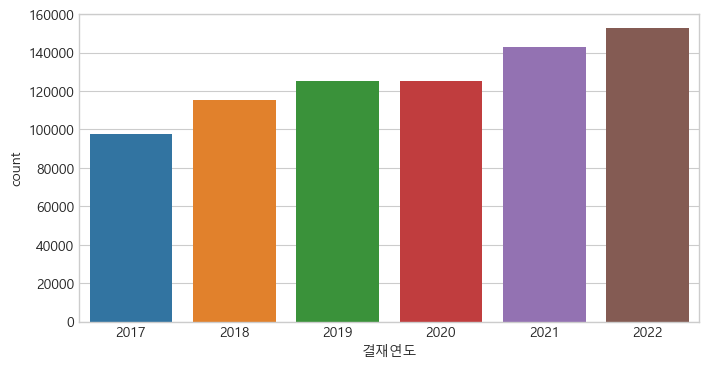

In [108]:
plt.figure(figsize=(8, 4))

sns.countplot(data=df, x='결재연도')

plt.show()

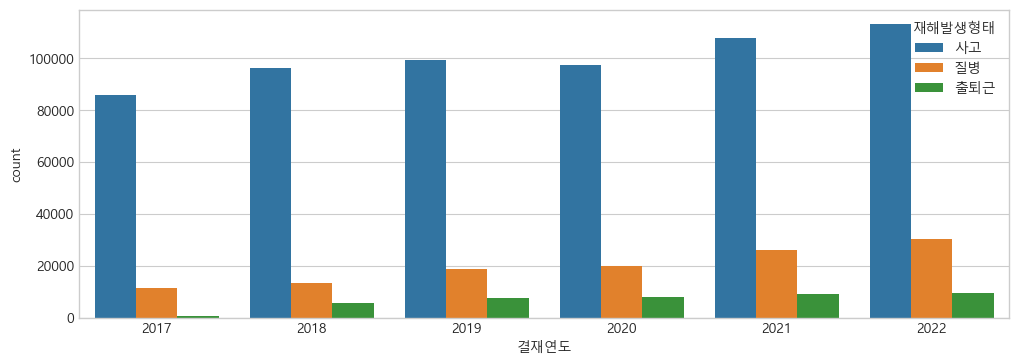

In [106]:
plt.figure(figsize=(12, 4))

sns.countplot(data=df, x='결재연도', hue='재해발생형태')

plt.show()

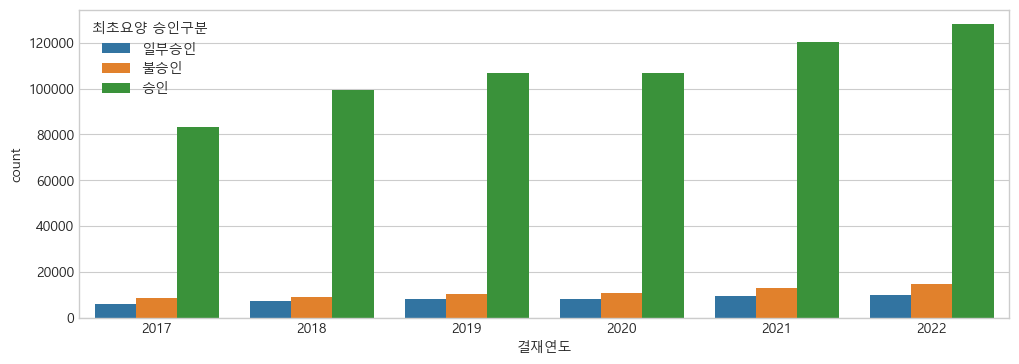

In [109]:
plt.figure(figsize=(12, 4))

sns.countplot(data=df, x='결재연도', hue='최초요양 승인구분')

plt.show()

In [ ]:
plt.figure(figsize=(12, 4))

sns.countplot(data=df, x='결재연도', hue='최초요양 승인구분')

plt.show()

In [116]:
df.iloc[:, :10]

,결재연도,재해당시연령,생년월일,외국인여부,재해발생형태,재해발생형태명,근로자구분,종사자지위코드,종사자지위명,고용형태코드
0,2017,49,1954,NaN,사고,출장 중의 사고 (시행령 제27조 제2항),1.0,1.0,상용,1.0
1,2017,36,1959,NaN,사고,출장 중의 사고 (시행령 제27조 제2항),1.0,1.0,상용,1.0
2,2017,56,1951,NaN,사고,업무수행 중의 사고 (시행령 제27조 제1항),1.0,1.0,상용,1.0
3,2017,33,1974,NaN,사고,업무수행 중의 사고 (시행령 제27조 제1항),1.0,3.0,일용,2.0
4,2017,35,1973,NaN,사고,업무수행 중의 사고 (시행령 제27조 제1항),8.0,4.0,근로자 아님,NaN
...,...,...,...,...,...,...,...,...,...,...
759463,2022,56,1966,NaN,사고,업무수행 중의 사고 (시행령 제27조 제1항),1.0,3.0,일용,2.0
759464,2022,37,1985,NaN,사고,업무수행 중의 사고 (시행령 제27조 제1항),2.0,1.0,상용,2.0
759465,2022,87,1935,N,질병,NaN,1.0,NaN,NaN,NaN
759466,2022,82,1940,N,질병,NaN,1.0,NaN,NaN,NaN


#### 재해당시연령

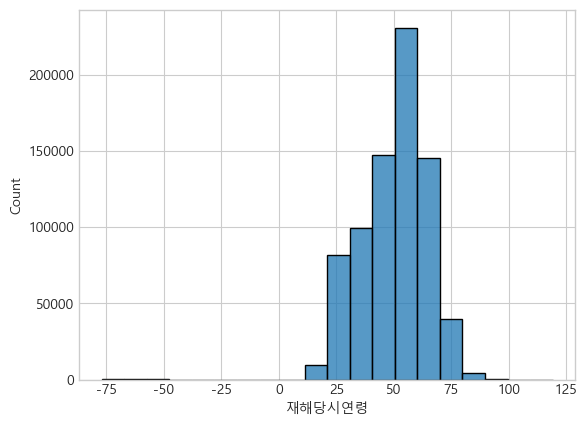

In [120]:
plt.figure()
sns.histplot(data=df, x='재해당시연령', bins=20)
plt.show()

In [121]:
df['재해당시연령'].min()

-77

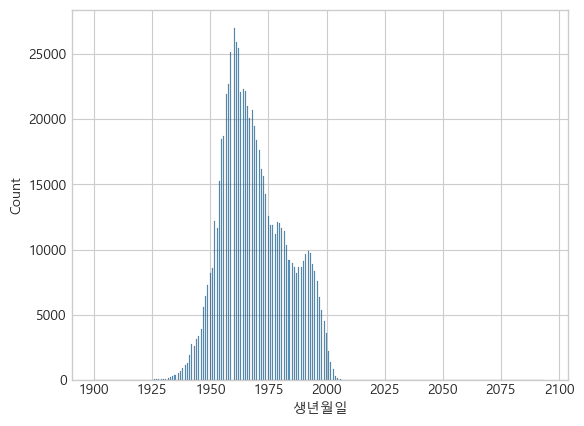

In [123]:
plt.figure()
sns.histplot(data=df, x='생년월일')
plt.show()

In [124]:
df['생년월일'].min()

1900

In [125]:
df['생년월일'].max()

2094

#### 외국인여부

In [126]:
df['외국인여부'].isna().sum()

708030

In [127]:
df['외국인여부'].unique()

array([nan, 'Y', 'N'], dtype=object)

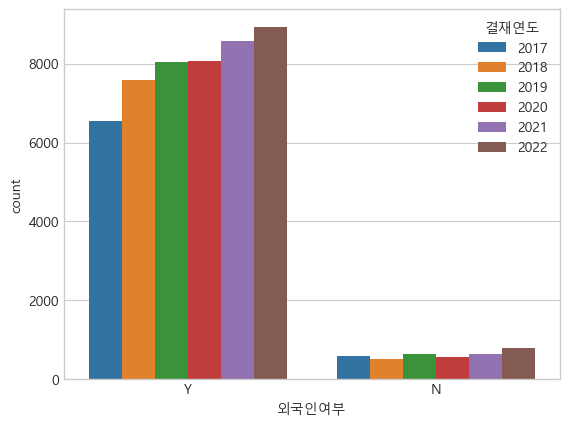

In [129]:
plt.figure()
sns.countplot(data=df, x='외국인여부', hue='결재연도')
plt.show()

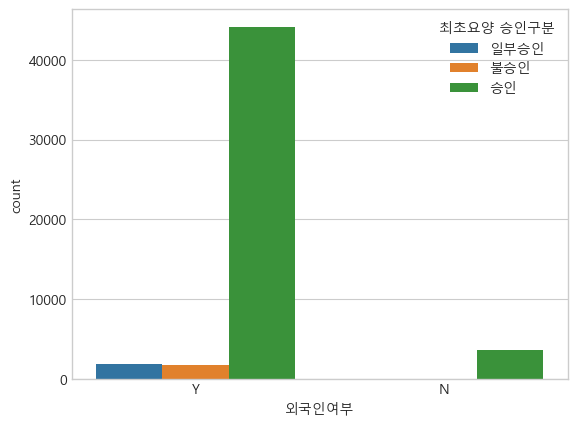

In [130]:
plt.figure()
sns.countplot(data=df, x='외국인여부', hue='최초요양 승인구분')
plt.show()

#### 재해발생형태

In [133]:
df['재해발생형태'].isnull().sum()

0

In [134]:
df['재해발생형태'].value_counts()

사고     599909
질병     119595
출퇴근     39964
Name: 재해발생형태, dtype: int64

In [135]:
df.groupby('결재연도')['재해발생형태'].size()

결재연도
2017     97750
2018    115261
2019    125423
2020    125415
2021    142939
2022    152680
Name: 재해발생형태, dtype: int64

In [136]:
df.groupby(['결재연도', '재해발생형태']).size()

결재연도  재해발생형태
2017  사고         85911
      질병         11313
      출퇴근          526
2018  사고         96251
      질병         13371
      출퇴근         5639
2019  사고         99136
      질병         18760
      출퇴근         7527
2020  사고         97580
      질병         19898
      출퇴근         7937
2021  사고        107885
      질병         26121
      출퇴근         8933
2022  사고        113146
      질병         30132
      출퇴근         9402
dtype: int64

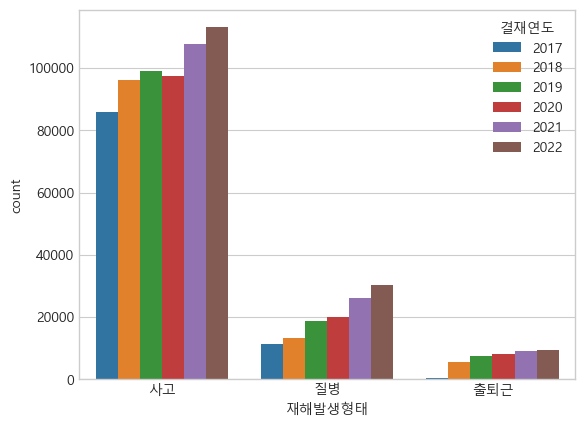

In [138]:
plt.figure()
sns.countplot(data=df, x='재해발생형태', hue='결재연도')
plt.show()

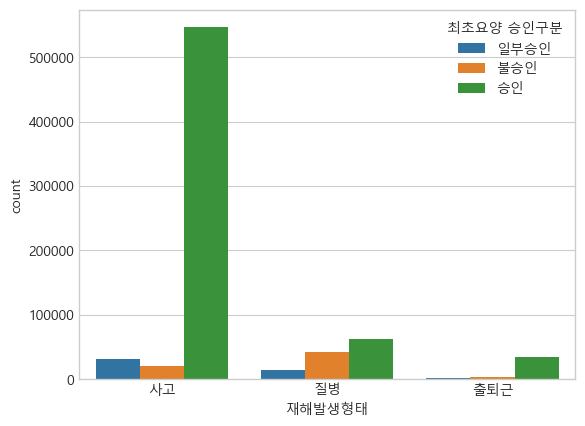

In [139]:
plt.figure()
sns.countplot(data=df, x='재해발생형태', hue='최초요양 승인구분')
plt.show()

#### 재해발생형태명

In [140]:
# 결측치 확인
df['재해발생형태명'].isnull().sum()

119595

In [141]:
# 값 확인
df['재해발생형태명'].unique()

array(['출장 중의 사고 (시행령 제27조 제2항)', '업무수행 중의 사고 (시행령 제27조 제1항)', nan,
       '행사 중의 사고(시행령 제30조)', '기타 사고', '제3자의 행위에 따른 사고(시행령 제33조)',
       '사업주 지배관리 하의 출퇴근', '시설물 등의 결함, 관리소홀로 발생한 사고(시행령 제28조)',
       '특수한 장소에서의 사고(시행령 제31조)', '휴게시간 중 사고(법 제37조 제1항 제1호 마목)',
       '통상의 출퇴근'], dtype=object)

In [143]:
# 재해발생형태별 결측치 확인
df[df['재해발생형태명'].isnull()]['재해발생형태'].value_counts() # 질병은 전부 없음

질병    119595
Name: 재해발생형태, dtype: int64

#### 근로자구분

In [148]:
df['근로자구분'].unique()

array([ 1.,  8.,  2., nan,  3.,  6.,  4.,  5.])

In [145]:
# 결측치 확인
df['근로자구분'].isna().sum()

219

In [147]:
# 결재연도
df[df['근로자구분'].isna()]['결재연도'].value_counts()

2018    50
2019    50
2020    37
2021    37
2017    25
2022    20
Name: 결재연도, dtype: int64

In [149]:
# 재해발생형태
df[df['근로자구분'].isna()]['재해발생형태'].value_counts()

질병    218
사고      1
Name: 재해발생형태, dtype: int64

In [155]:
# 재해발생형태: 사고
df[(df['근로자구분'].isna()) & (df['재해발생형태']=='사고')]

,결재연도,재해당시연령,생년월일,외국인여부,재해발생형태,재해발생형태명,근로자구분,종사자지위코드,종사자지위명,고용형태코드,...,수급권자수,공사시작일,공사종료일,산재업종코드,산재업종코드명,고용업종코드,고용업종코드명,산재 상시인원,고용 상시인원,총상시인원
730722,2022,56,1966,NaN,사고,업무수행 중의 사고 (시행령 제27조 제1항),NaN,3.0,일용,2.0,...,NaN,20201201.0,20230930,40001.0,건축건설공사,42311.0,일반전기 공사업,36.0,15.0,34.0


In [158]:
df['근로자구분'].value_counts().sort_index().to_frame()

,근로자구분
1.0,728662
2.0,21706
3.0,7693
4.0,30
5.0,14
6.0,73
8.0,1071


#### 종사자지위코드

In [160]:
df['종사자지위코드'].isnull().sum()

4012

In [161]:
df['종사자지위코드'].unique()

array([ 1.,  3.,  4.,  2., nan])

In [162]:
df['종사자지위코드'].value_counts()

1.0    495702
3.0    219386
2.0     32872
4.0      7496
Name: 종사자지위코드, dtype: int64

#### 종사자지위명

In [163]:
df['종사자지위명'].isna().sum()

4012

In [164]:
df['종사자지위명'].unique()

array(['상용', '일용', '근로자 아님', '임시', nan], dtype=object)

In [165]:
df['종사자지위명'].value_counts()

상용        495702
일용        219386
임시         32872
근로자 아님      7496
Name: 종사자지위명, dtype: int64

#### 고용형태코드

In [167]:
df['고용형태코드'].isna().sum()

11436

In [168]:
df['고용형태코드'].unique()

array([ 1.,  2., nan])

In [169]:
df['고용형태코드'].value_counts()

1.0    455111
2.0    292921
Name: 고용형태코드, dtype: int64

#### 고용형태명

In [170]:
df['고용형태명'].isna().sum()

11436

In [171]:
df['고용형태명'].unique()

array(['정규직', '비정규직', nan], dtype=object)

In [172]:
df['고용형태명'].value_counts()

정규직     455111
비정규직    292921
Name: 고용형태명, dtype: int64

#### 직종코드

In [173]:
df['직종코드'].isna().sum()

9

In [174]:
df['직종코드'].unique()

array(['23212', '30000', '82116', '90000', '93090', '31620', '73221',
       '82135', '71119', '91313', '83200', '23723', '42100', '13222',
       '91319', '73000', '31520', '83110', '13503', '03094', '72111',
       '02430', '71240', '02340', '13509', '02370', '84110', '13234',
       '23600', '992', '910', '853', '930', '772', '139', '510', '862',
       '311', '873', '799', '120', '132', '141', '832', '221', '882',
       '441', '921', '952', '149', 'E0911', '991', '612', '743', '922',
       '313', '999', '235', '320', '620', '71130', '899', '751', '399',
       '392', '153', '241', '135', '854', '159', '875', '843', '730',
       '771', '812', '431', '941', '841', '842', '891', '251', '71111',
       'E0950', 'E0920', '231', '312', '752', '613', '741', '871', '774',
       '253', '863', '246', '821', '71139', '274', '773', '851', '421',
       '239', '855', '762', '892', '753', '442', '942', '151', '780',
       '234', '236', '742', '864', '81112', '70000', '953', '876', '134',
  

In [175]:
df['직종코드'].nunique()

325

#### 직종명

In [176]:
df['직종명'].isnull().sum()

76

In [177]:
df['직종명'].unique()

array(['전기안전 기술공', '사무 종사자', '프레스기 및 전단기 조작원', '단순노무 종사자',
       '기타 제조관련 단순노무 종사자', '생산사무 종사자', '건설기계 설치 및 정비원',
       '석면 시멘트제품 가공기 조작원', '기타 광원 및 채석원', '물품 배달원', '전기 및 전자장비 조립 종사자',
       '품질 검사원', '음식 조리 종사자', '반도체 기술자', '기타 배달 및 수하물 운반원',
       '기계설치 및 정비 기능 종사자', '금융 및 보험사무 종사자', '자동차 조립 종사자', '생산관리 기술자',
       '오락, 문화 및 운동관련 서비스업 일반관리자', '금속모형 제조원', '판매부서 관리자', '건축 목공',
       '도소매업 운영부서 관리자', '그외 기타 기술자', '사업서비스업 운영부서 관리자', '철도 기관사', '조선기술자',
       '선박·항공기 조종사 및 기술 종사자', '계기검침·수금 및주차 관련 종사원', '건설 및 광업 단순 종사원',
       '자동조립라인 및 산업용 로봇 조작원', '제조관련 단순 종사원', '건설관련 기능 종사자',
       '기타 전문서비스 관리자', '영업종사자', '전기 및 전자 설비 조작원', '행정 사무원', '자동차 운전원',
       '기타 기능관련 종사자', '행정 및 경영지원 관리자', '보험 및 금융 관리자', '건설·전기 및 생산 관련 관리자',
       '화학?고무 및 플라스틱 제품 생산기 조작원', '컴퓨터 하드웨어 및통신공학 전문가',
       '재활용 처리 및 소각로 조작원', '주방장 및 조리사', '하역 및 적재 단순 종사원', '음식관련 단순 종사원',
       '기타 건설·전기 및 생산 관련 관리자', '[생보,(농협2012.03.02폐지)]보험설계사',
       '화학·고무 및 플라스틱 제품 생산기 조작원', '농림어업관련 단순 종사원', '원예 및 조경 종사자', '용접원',
 

In [178]:
df['직종명'].nunique()

415

In [180]:
# 직종코드 결측치 확인
df[df['직종코드'].isna()]['직종명']

85244     NaN
214536    NaN
305984    NaN
390537    NaN
465742    NaN
469702    NaN
474170    NaN
620885    NaN
658221    NaN
Name: 직종명, dtype: object

In [182]:
# 직종명 결측치 확인
df[df['직종명'].isna()]['직종코드'].unique()

array(['711', '911', nan, '949', '713', '9170337792', '700', '9180337152',
       '9140771856', '990', '11', '772', '3', '921-20-359'], dtype=object)

In [183]:
df[df['직종명'].isna()]['직종코드'].value_counts()

711           52
713            4
911            1
949            1
9170337792     1
700            1
9180337152     1
9140771856     1
990            1
11             1
772            1
3              1
921-20-359     1
Name: 직종코드, dtype: int64

#### 보험가입자 의견

In [185]:
df['보험가입자 의견'].isnull().sum()

10169

In [186]:
df['보험가입자 의견'].value_counts()

인정     635263
불인정     63183
미확인     50853
Name: 보험가입자 의견, dtype: int64

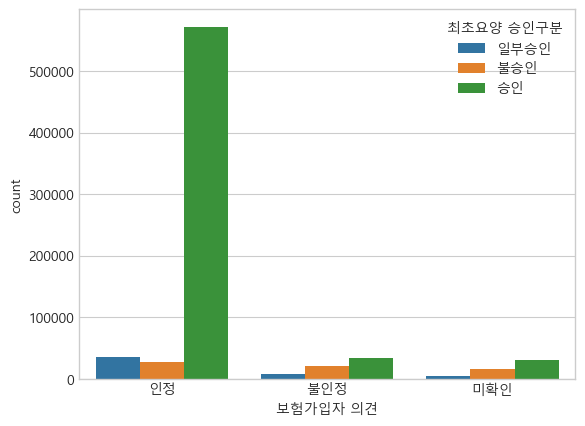

In [189]:
plt.figure()
sns.countplot(data=df, x='보험가입자 의견', hue='최초요양 승인구분')
plt.show()

#### 불인정사유코드

In [191]:
df['불인정사유코드'].isna().sum()

691398

In [192]:
df['불인정사유코드'].value_counts()

2.0     42314
6.0     15102
4.0      6940
5.0      1922
99.0     1414
3.0       203
7.0       119
1.0        50
9.0         4
8.0         2
Name: 불인정사유코드, dtype: int64

#### 불인정사유명

In [193]:
df['불인정사유명'].isna().sum()

691398

In [194]:
df['불인정사유명'].value_counts()

재해경위신뢰성결여                       42314
사적재해                            15102
미확인-폐업·소멸,연락불가,미회신               6940
거부-개인질환                          1922
거부-기타                            1414
거부-날인요청 없었음                       203
거부-근로기준법상 근로자 아님                  119
거부-다른배상,합의,시효완성                    50
거부-보험가입자의 지휘명령을 받지 않은 노조활동 등        4
거부-노조전임자,근로시간면제자                    2
Name: 불인정사유명, dtype: int64

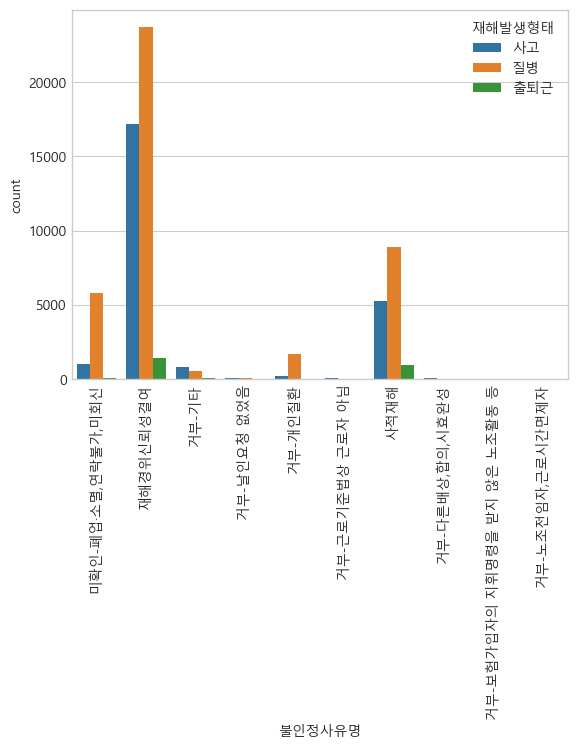

In [197]:
plt.figure()
sns.countplot(data=df, x='불인정사유명', hue='재해발생형태')
plt.xticks(rotation=90)
plt.show()

#### 미가입 여부

In [198]:
df['미가입 여부'].isnull().sum()

26

In [199]:
df['미가입 여부'].value_counts()

N    734442
Y     22308
       2692
Name: 미가입 여부, dtype: int64

In [202]:
df['미가입 여부'].unique()

array(['N', ' ', 'Y', nan], dtype=object)

#### 태납 여부

In [205]:
basic_func('태납 여부')

결측치 수: 26

value_counts()
N    671393
Y     85343
       2706
Name: 태납 여부, dtype: int64

유니크 값
['N' ' ' 'Y' nan]


In [240]:
for i, j in grouped.reset_index().values:
    if len(j) > 1:
        print(i, j)

111 ['의회의원·고위공무원 및 공공단체임원' '의회의원?고위공무원 및 공공단체임원' '의회의원.고위공무원 및 공공단체임원']
131 ['연구·교육 및 법률 관련 관리자' '연구?교육 및 법률 관련 관리자' '연구.교육 및 법률 관련 관리자']
134 ['문화·예술·디자인 및 영상 관련 관리자' '문화?예술?디자인 및 영상 관련 관리자' '문화.예술.디자인 및 영상 관련 관리자']
141 ['건설·전기 및 생산 관련 관리자' '건설?전기 및 생산 관련 관리자' '건설.전기 및 생산 관련 관리자']
149 ['기타 건설·전기 및 생산 관련 관리자' '기타 건설?전기 및 생산 관련 관리자' '기타 건설.전기 및 생산 관련 관리자']
153 ['환경·청소 및 경비 관련 관리자' '환경?청소 및 경비 관련 관리자' '환경.청소 및 경비 관련 관리자']
233 ['금속?재료 공학 기술자및 시험원' '금속·재료 공학 기술자및 시험원' '금속.재료 공학 기술자및 시험원']
235 ['전기·전자 및 기계 공학 기술자 및 시험원' '전기?전자 및 기계 공학 기술자 및 시험원'
 '전기.전자 및 기계 공학 기술자 및 시험원']
237 ['항공기?선박 기관사 및 관제사' '항공기·선박 기관사 및 관제사' '항공기.선박 기관사 및 관제사']
254 ['문리·기술 및 예능 강사' '문리?기술 및 예능 강사' '문리.기술 및 예능 강사']
273 ['상품기획·홍보 및 조사 전문가' '상품기획?홍보 및 조사 전문가' '상품기획.홍보 및 조사 전문가']
281 ['작가·기자 및 출판 전문가' '작가?기자 및 출판 전문가' '작가.기자 및 출판 전문가']
282 ['큐레이터?사서 및 기록물관리사' '큐레이터·사서 및 기록물관리사' '큐레이터.사서 및 기록물관리사']
283 ['연극·영화 및 영상 전문가' '연극?영화 및 영상 전문가' '연극.영화 및 영상 전문가']
284 ['화가·사진가 및 공연예술가' '화가?사진가 및 공연예술가' '화가.사진가 및 공연예술가']
289 ['매니저 및 

In [244]:
grouped = df.groupby('산재업종코드')['산재업종코드명'].unique()

for name in grouped:
    # if len(name) > 1:
        print(name)

['금융업']
['보험 및 연금업']
['금융 및 보험관련서비스업']
['무연탄광업']
['기타석탄광업']
['암석채굴.채취업']
['금속광업']
['비금속광업']
['암석채굴.채취업']
['점토채굴.채취업']
['석회석(백운석,대리석 포함)광업']
['금속광업']
['비금속광업']
['석탄선별업']
['쇄석채취업']
['토사채굴.채취업']
['기타 광물 채굴.채취업']
['흑연광업']
['석탄선별업']
['사광업']
['쇄석채취업']
['토사채굴.채취업']
['기타 광물 채굴.채취업']
['연탄및응집고체연료생산업']
['육제품 또는 유제품제조업']
['야채및과실의 통조림과 기타절임식료품제조업']
['수산식료품제조업']
['빵 및 과자류제조업']
['제당 및 정당업']
['도정 및 제분업']
['조미료(장류포함)제조업 및 제염업']
['제빙업']
['음료제조업']
['기타 식료품제조업']
['직물업']
['의복 및 장신품 등의 제조업']
['의복 및 장신품 등의 제조업']
['표백 및 염색가공업']
['방적제사 및 화학섬유제품제조업']
['화학섬유제조업']
['기타 섬유제품제조업']
['일반제재업']
['베니어판 등 제조업']
['목재 및 나무제품 제조업']
['목재건구제조업']
['목재가구제조업']
['기타 목재 및 목제품제조업']
['일반제재 및 목재 약품처리업']
['목재약품 처리업']
['베니어판등 제조업']
['펄프제조업']
['지류제조업']
['섬유판제조업']
['골판지 및 종이용기제조업']
['위생용종이제품제조업']
['펄프제조업']
['지류제조업']
['골판지 및 종이용기제조업']
['제본 또는 인쇄물가공업']
['위생용종이제품제조업']
['출판업 및 음반제조업']
['인쇄업']
['사진제판식자 등의 제조업']
['제본 또는 인쇄물가공업']
['인쇄업']
['유기화학제품제조업']
['무기화학제품제조업']
['화학비료제조업']
['도료제품 또는 유지가공제품제조업']
['화약 및 성냥제조업']
['동식물유지제조업']
['합성수지제조업']
['천연수지

In [246]:
grouped = df.groupby('산재업종코드명')['산재업종코드'].unique()

for code in grouped:
    if len(code) > 1:
        print(code)

[21830. 22307.]
[21409. 21504. 21856.]
[21835. 22312.]
[50011. 50807. 50406. 50504.]
[21828. 22305.]
[40010. 90301.]
[21853. 21406. 21501.]
[22414. 22806.]
[20913. 21201.]
[20411. 20504.]
[90717. 91202.]
[22410. 22802.]
[21849. 21402.]
[90715. 90901. 90510.]
[50106. 50302.]
[21827. 22304.]
[10101. 10302.]
[40003. 40301.]
[10508. 10311.]
[20209. 23204.]
[21852. 21405.]
[22910. 23004.]
[50007. 50902. 50803.]
[21836. 22313.]
[21844. 22706.]
[50105. 50301.]
[21825. 22302.]
[21857. 21301. 21410. 21505.]
[21834. 22311.]
[21833. 22310.]
[20207. 23202.]
[90801. 90714.]
[91101. 90507.]
[10102. 10303.]
[22908. 23002.]
[90104. 90502. 91401.]
[10305. 10502.]
[21812. 22107.]
[21829. 22306.]
[21832. 22309.]
[10309. 10506.]
[50401. 50112.]
[22411. 22803.]
[21601. 21859. 21507. 21412.]
[22416. 22808.]
[21839. 22203.]
[10201. 10006.]
[21855. 21408. 21503.]
[21005. 23802.]
[21840. 22204.]
[90716. 91201.]
[22201. 21837.]
[50005. 50801.]
[22301. 21824.]
[90201. 90102.]
[20412. 20506.]
[21403. 21850.]
[218

In [248]:
grouped = df.groupby('상병명')['상병코드'].unique()

for code in grouped:
    if len(code) > 1:
        print(code)

['H187' 'H1878']
['H168' 'H1688']
['H335' 'H3358']
['I728' 'I7288']
['J128' 'J1288']
['I422' 'I4228']
['I428' 'I4288']
['H9328' 'H932']
['H208' 'H2088']
['G938' 'G9388']
['T8188' 'T818']
['M223' 'M228']
['M2591' 'M2491']
['R509' 'R5099']
['J8418' 'J841']
['I5004' 'I5010']
['R098' 'R0988']
['S3350' 'S335']
['R090' 'T71']
['K259' 'K2591']
['K250' 'K2501']
['S5319' 'S531']
['J9848' 'J984']


### 의문점 확인

#### 연도별 직종코드와 직종명 변화가 있을까?

In [249]:
df['결재연도'].unique()

array([2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [256]:
for year in df['결재연도'].unique():
    print(year)
    grouped = df[df['결재연도']==year].groupby('직종코드')['직종명'].unique()
    print()
    
    for name in grouped:
        if len(name) > 1:
            print(name)
    print()        
    print()

2017

['의회의원·고위공무원 및 공공단체임원' '의회의원?고위공무원 및 공공단체임원']
['연구·교육 및 법률 관련 관리자' '연구?교육 및 법률 관련 관리자']
['문화·예술·디자인 및 영상 관련 관리자' '문화?예술?디자인 및 영상 관련 관리자']
['건설·전기 및 생산 관련 관리자' '건설?전기 및 생산 관련 관리자']
['기타 건설·전기 및 생산 관련 관리자' '기타 건설?전기 및 생산 관련 관리자']
['환경·청소 및 경비 관련 관리자' '환경?청소 및 경비 관련 관리자']
['금속?재료 공학 기술자및 시험원' '금속·재료 공학 기술자및 시험원']
['전기·전자 및 기계 공학 기술자 및 시험원' '전기?전자 및 기계 공학 기술자 및 시험원']
['항공기?선박 기관사 및 관제사' '항공기·선박 기관사 및 관제사']
['문리·기술 및 예능 강사' '문리?기술 및 예능 강사']
['상품기획·홍보 및 조사 전문가' '상품기획?홍보 및 조사 전문가']
['작가·기자 및 출판 전문가' '작가?기자 및 출판 전문가']
['큐레이터?사서 및 기록물관리사' '큐레이터·사서 및 기록물관리사']
['연극·영화 및 영상 전문가' '연극?영화 및 영상 전문가']
['화가·사진가 및 공연예술가' '화가?사진가 및 공연예술가']
['매니저 및 기타 문화·예술관련 종사자' '매니저 및 기타 문화?예술관련 종사자']
['여행·안내 및 접수 사무원' '여행?안내 및 접수 사무원']
['경찰?소방 및 교도 관련 종사자' '경찰·소방 및 교도 관련 종사자']
['의료·복지 관련 서비스종사자' '의료?복지 관련 서비스종사자']
['이·미용 및 관련 서비스 종사자' '이?미용 및 관련 서비스 종사자']
['기타 이미용?예식 및 의료보조 서비스 종사자' '기타 이미용·예식 및 의료보조 서비스 종사자']
['방문?노점 및 통신 판매 관련 종사자' '방문·노점 및 통신 판매 관련 종사자']
['목재·가구·악기 및 간판 관련 기능 종사자' '목재?가구?악기 및 간판 관련 기능 종사자']
['

+ 연도별로 코드가 변경되어 한 코드에 여러 개의 직종명이 잡힌 것으로 생각됐으나 확인해본 결과 코드 변경은 아닌 것으로 보임

#### 연도별로 상병명과 상병코드 확인하기

In [264]:
for year in df['결재연도'].unique():
    print(year)
    grouped = df[df['결재연도']==year].groupby('상병명')['상병코드'].unique().reset_index()
    print()
    
    for name, code in grouped.values:
        if len(code) > 1:
            print(f'{name}: {code}')
            
    print()        
    print()

2017

뇌의 기타 명시된 장애: ['G938' 'G9388']
요추의 염좌 및 긴장: ['S3350' 'S335']
질식: ['R090' 'T71']
팔꿈치의 상세불명 탈구: ['S5319' 'S531']


2018

질식: ['R090' 'T71']


2019

기타 명시된 동맥의 동맥류 및 박리: ['I728' 'I7288']
무릎뼈의 기타 장애: ['M223' 'M228']
요추의 염좌 및 긴장: ['S3350' 'S335']
질식: ['R090' 'T71']


2020

요추의 염좌 및 긴장: ['S3350' 'S335']
질식: ['R090' 'T71']
폐의 기타 장애: ['J984' 'J9848']


2021

기타 각막염: ['H1688' 'H168']
기타 망막박리: ['H3358' 'H335']
기타 비대성 심근병증: ['I4228' 'I422']
기타 심근병증: ['I428' 'I4288']
섬유증을 동반한 기타 간질성 폐질환: ['J8418' 'J841']
질식: ['T71' 'R090']
팔꿈치의 상세불명 탈구: ['S5319' 'S531']


2022

상세불명의 관절장애, 어깨부분: ['M2591' 'M2491']
상세불명의 열: ['R509' 'R5099']
섬유증을 동반한 기타 간질성 폐질환: ['J8418' 'J841']
요추의 염좌 및 긴장: ['S3350' 'S335']
질식: ['R090' 'T71']




+ 연도별로 코드 및 코드명이 변경된 것은 아니다.
+ 각 코드별로 끝의 숫자 하나가 다른 경우가 있음. 
    - 오타가 난 것인지 아니면 혼용해서 사용하는듯 함.
+ 질식 같은 경우 매년 두 개의 코드가 사용됨.
    - 질식의 종류가 다를 수 있을듯 ex) 음식, 다른 경우 등

#### 연도별 산재업종코드 및 산재업종코드명 확인하기

In [276]:
for year in df['결재연도'].unique():
    print(year)
    print()
    grouped = df[df['결재연도']==year].groupby('산재업종코드명')['산재업종코드'].unique().reset_index()
    
    for name, code in grouped.values:
        if len(code) > 1:
            print(f'{name}: {code}')
    print()
    print()

2017

가정용, 사무용, 서비스용 기계기구제조업: [21830. 22307.]
각종 시멘트제품 제조업: [21409. 21504. 21856.]
각종기계 또는 동 부속품제조업: [21835. 22312.]
각종운수부대사업: [50011. 50807.]
건설기계 또는 광산기계 및 설비품제조업: [21828. 22305.]
건설용 점토제품제조업: [21853. 21406. 21501.]
계측기 또는 시험기제조업: [22414. 22806.]
고무제품제조업: [20913. 21201.]
골판지 및 종이용기제조업: [20411. 20504.]
골프장 및 경마장 운영업: [90717. 91202.]
광학유리제조업: [21849. 21402.]
교육서비스업: [90715. 90901.]
구역화물운수업: [50106. 50302.]
금속가공기계제조업: [21827. 22304.]
금속광업: [10101. 10302.]
기타 광물 채굴.채취업: [10508. 10311.]
기타 섬유제품제조업: [20209. 23204.]
기타 유리제품제조업: [21852. 21405.]
기타각종제조업: [22910. 23004.]
기타보관업: [50007. 50902.]
기타수송용 기계기구제조업: [21844. 22706.]
농업용기계제조업: [21825. 22302.]
도자기제조업: [21857. 21301. 21410. 21505.]
동력용 전기기계기구제조업: [21834. 22311.]
방적제사 및 화학섬유제품제조업: [20207. 23202.]
보건 및 사회복지사업: [90801. 90714.]
비금속광업: [10102. 10303.]
사업서비스업: [90104. 90502. 91401.]
석탄선별업: [10305. 10502.]
쇄석채취업: [10309. 10506.]
수상운수업: [50401. 50112.]
시멘트제조업: [21601. 21859. 21507. 21412.]
알루마이트가공업: [21839. 22203.]
암석채굴.채취업: [10201. 10006.]
열처리사업

+ 코드 변경으로 인해서 여러개로 나눠진 것은 아닌 걸로 보인다.